In [10]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [11]:
sd.default.device = (24, None)

In [12]:
SAMPLE_RATE = 48000
BUFFER_SIZE = 1024

In [13]:
audio_buffer = np.zeros(BUFFER_SIZE)

In [ ]:
def audio_callback(indata, frames, time, status):
    global audio_buffer
    if status:
        print(f"오디오 상태 경고: {status}")
    audio_buffer = indata[:, 0]

실시간 마이크 입력 시작 (Ctrl+C 또는 창 닫기 시 종료)


C:\Users\Threadnull\AppData\Local\Temp\ipykernel_15484\1769372345.py:25: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_plot, interval=30)
c:\Users\Threadnull\anaconda3\envs\pytorch_2.6.0\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


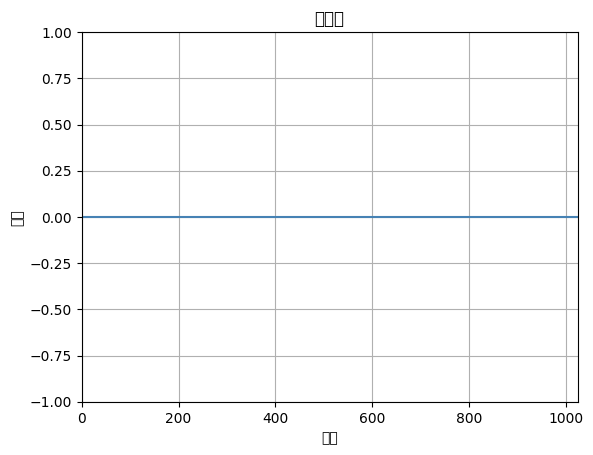

In [15]:
fig, ax = plt.subplots()
x = np.arange(BUFFER_SIZE)
line, = ax.plot(x, np.zeros(BUFFER_SIZE), color='steelblue')
ax.set_ylim(-1, 1)
ax.set_xlim(0, BUFFER_SIZE)
ax.set_title("오디오")
ax.set_xlabel("샘플")
ax.set_ylabel("진폭")
ax.grid(True)

def update_plot(frame):
    line.set_ydata(audio_buffer)
    return line,

stream = sd.InputStream(
    samplerate=SAMPLE_RATE,
    blocksize=BUFFER_SIZE,
    channels=1,
    dtype='float32',
    callback=audio_callback
)

print("실시간 마이크 입력 시작 (Ctrl+C 또는 창 닫기 시 종료)")
with stream:
    ani = animation.FuncAnimation(fig, update_plot, interval=30)
    plt.show()